In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as sf
%matplotlib inline

# Soal 1

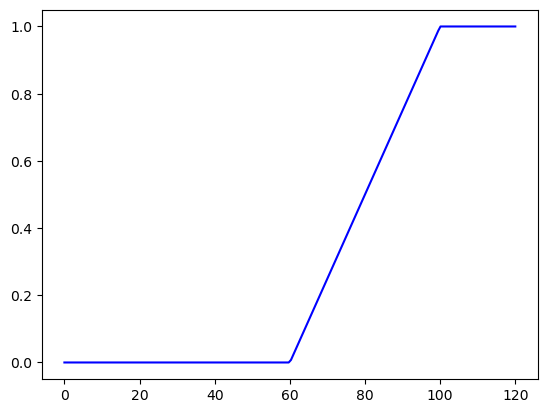

In [2]:
himpunan =  np.linspace(0,120,200)
x = sf.trapmf(himpunan,[60,100,120,120])
plt.plot(himpunan,x,"-b")
plt.show()

In [3]:
test = np.array([0,60,70,90,110])
print(sf.trapmf(test,[60,100,120,120]))

[0.   0.   0.25 0.75 1.  ]


# Soal 2

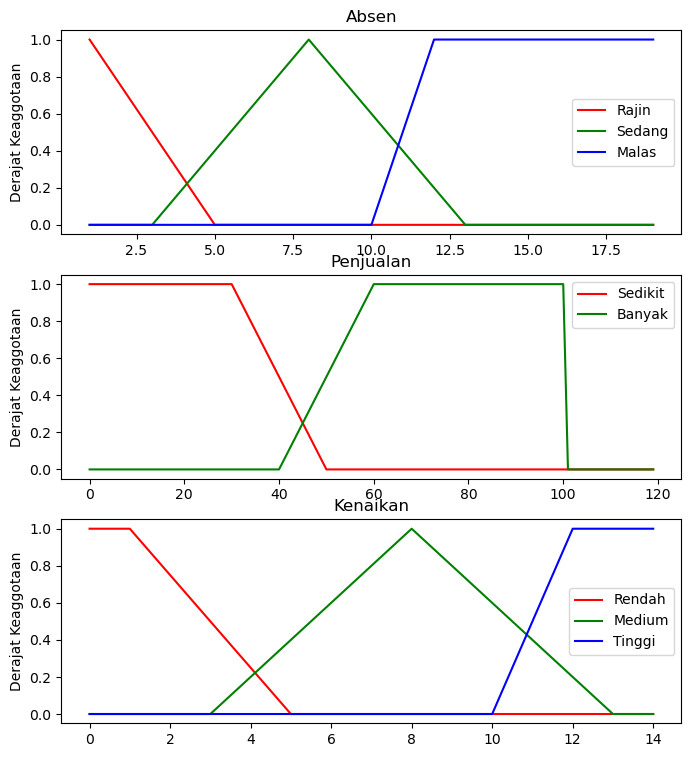

In [4]:
# Antacedent 
absen  = np.arange(1,20)
mu_rajin = sf.trapmf(absen,[0,0,1,5])
mu_sedang = sf.trimf(absen,[3,8,13])
mu_malas = sf.trapmf(absen,[10,12,20,20])

penjualan = np.arange(0,120)
mu_sedikit = sf.trapmf(penjualan,[0,0,30,50])
mu_banyak = sf.trapmf(penjualan,[40,60,100,100])

# Consecuent
kenaikan = np.arange(0,15)
mu_rendah = sf.trapmf(kenaikan,[0,0,1,5])
mu_medium = sf.trimf(kenaikan,[3,8,13])
mu_tinggi = sf.trapmf(kenaikan,[10,12,15,15])

fig, (mf1,mf2,mf3) = plt.subplots(nrows=3,figsize=(8,9))
mf1.plot(absen,mu_rajin,'r',linewidth=1.5,label="Rajin")
mf1.plot(absen,mu_sedang,'g',linewidth=1.5,label="Sedang")
mf1.plot(absen,mu_malas,'b',linewidth=1.5,label="Malas")
mf1.set_title("Absen")
mf1.set_ylabel("Derajat Keaggotaan")
mf1.legend()

mf2.plot(penjualan,mu_sedikit,'r',linewidth=1.5,label="Sedikit")
mf2.plot(penjualan,mu_banyak,'g',linewidth=1.5,label="Banyak")
mf2.set_title("Penjualan")
mf2.set_ylabel("Derajat Keaggotaan")
mf2.legend()

mf3.plot(kenaikan,mu_rendah,'r',linewidth=1.5,label="Rendah")
mf3.plot(kenaikan,mu_medium,'g',linewidth=1.5,label="Medium")
mf3.plot(kenaikan,mu_tinggi,'b',linewidth=1.5,label="Tinggi")
mf3.set_title("Kenaikan")
mf3.set_ylabel("Derajat Keaggotaan")
mf3.legend()

In [10]:
# data crisp
jumlahAbsen = 4
totalPenjualan = 100

antacedent1 = np.fmin(sf.interp_membership(absen,mu_rajin,jumlahAbsen) , sf.interp_membership(penjualan,mu_banyak,totalPenjualan))
antacedent2 = np.fmin(sf.interp_membership(absen,mu_sedang,jumlahAbsen) , sf.interp_membership(penjualan,mu_banyak,totalPenjualan))
antacedent3 = np.fmin(sf.interp_membership(absen,mu_malas,jumlahAbsen) , sf.interp_membership(penjualan,mu_sedikit,totalPenjualan))
antacedent4 = np.fmin(sf.interp_membership(absen,mu_malas,jumlahAbsen) , sf.interp_membership(penjualan,mu_banyak,totalPenjualan))


# rules
R1 = np.fmin(antacedent1,mu_tinggi)
print(mu_tinggi)
print(R1)
R2 = np.fmin(antacedent2,mu_medium)
R3 = np.fmin(antacedent3,mu_rendah)
R4 = np.fmin(antacedent4,mu_medium)

# agregasi 
aggregated = np.fmax(R1,np.fmax(R2,np.fmax(R3,R4)))
if np.sum(aggregated) == 0 :
    gaji=0
else:
    gaji = sf.defuzz(kenaikan,aggregated,"centroid")
print(gaji)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  1.  1. ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.25 0.25
 0.25]
9.014652014652015
